In [3]:
# Import libraries
import pandas as pd
import numpy as np

In [5]:
# Read excel file with 16 sheets
filename = 'data_schema_final.xlsx'
customers = pd.read_excel(io=filename, sheet_name='Customers')

In [6]:
# Import pandas and pandasql libraries
import pandas as pd
from pandasql import sqldf

# Create a sample dataframe
df = pd.DataFrame({'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'], 'age': [25, 30, 35, 40, 45], 'gender': ['F', 'M', 'M', 'M', 'F']})

# Define a SQL query as a string
query = "SELECT * FROM df WHERE age > 20"

# Pass the query and the dataframe to the sqldf function
result = sqldf(query)

# Print the result
print(result['name'])

0      Alice
1        Bob
2    Charlie
3      David
4        Eve
Name: name, dtype: object


In [7]:
customer_assets = pd.read_excel(io=filename, sheet_name='Customer_Assets')

In [8]:
asset_objectives = pd.read_excel(io=filename, sheet_name='Asset_Objectives')

In [9]:
questions = pd.read_excel(io=filename, sheet_name='Questions')

In [10]:
answers = pd.read_excel(io=filename, sheet_name='Answers')

In [12]:
customer_answers = pd.read_excel(io=filename, sheet_name='Customer_Answers')

In [13]:
risk_profile = pd.read_excel(io=filename, sheet_name='Risk_Profile')

In [14]:
asset_classes = pd.read_excel(io=filename, sheet_name='Asset_Classes')

In [16]:
fee_structures = pd.read_excel(io=filename, sheet_name='Fee_Structures')

In [17]:
potential_funds = pd.read_excel(io=filename, sheet_name='Potential_Funds')

In [18]:
fund_assets = pd.read_excel(io=filename, sheet_name='Fund_Assets')

In [19]:
customer_funds = pd.read_excel(io=filename, sheet_name='Customer_Funds')

In [20]:
fund_targets = pd.read_excel(io=filename, sheet_name='Fund_Targets')

In [21]:
engagement_frequencies = pd.read_excel(io=filename, sheet_name='Engagement_Frequencies')

In [22]:
engagement_types = pd.read_excel(io=filename, sheet_name='Engagement_Types')

In [23]:
customer_engagement_preferences = pd.read_excel(io=filename, sheet_name='Customer_Engagement_Preferences')

In [25]:
# Customers Segments:

# age vs assets(total)
# no of dependents vs assets(total)
# risk category and age
# available assets and risk category
# gender vs risk/total
# maritial vs risk/total
# state vs risk/total
# asset_class vs risk_profile_id
# martial_status vs no_of_dependents

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Marital_Status', ylabel='Number_Of_Dependents'>

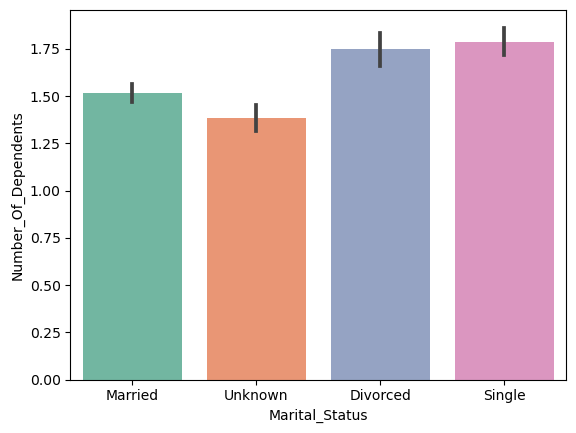

In [48]:
sns.barplot(x=customers['Marital_Status'], y=customers['Number_Of_Dependents'], data=customers, palette="Set2")

In [50]:
customers['Marital_Status'] = customers['Marital_Status'].fillna("unknown")

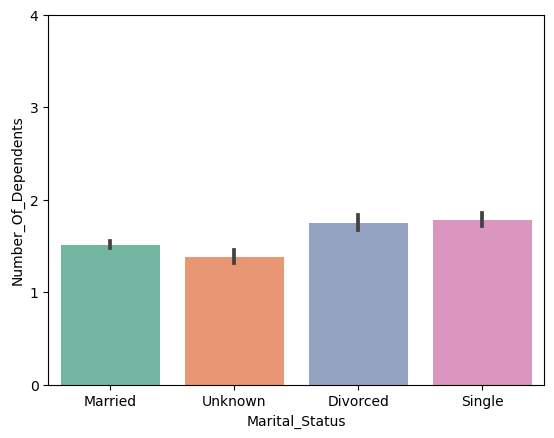

In [52]:
sns.barplot(x=customers['Marital_Status'], y=customers['Number_Of_Dependents'], data=customers, palette="Set2")
plt.yticks(range(5))
plt.show()

In [58]:
# -- What is the relationship between risk category and age?

# select rp.Risk_Profile_ID, rp.Risk_Profile, avg(c.age)
# from customers c
# join customer_assets2 ca on c.customer_ID = ca.customer_ID
# join customer_answers qa on c.customer_ID = qa.customer_ID
# join answers ans on qa.question_id = ans.question_id and qa.answer_id = ans.question_id
# join risk_profile rp on ans.Risk_Profile_ID = rp.Risk_Profile_ID
# group by rp.Risk_Profile_ID, rp.Risk_Profile
# order by rp.Risk_Profile_ID, rp.Risk_Profile;

In [42]:
customers.columns = customers.columns.str.lower()

In [44]:
customer_assets.columns = customer_assets.columns.str.lower()
customer_answers.columns = customer_answers.columns.str.lower()
answers.columns = answers.columns.str.lower()
risk_profile.columns = risk_profile.columns.str.lower()

In [56]:
df = pd.merge(customers, customer_assets, on="customer_id")
df = pd.merge(df, customer_answers, on="customer_id")
df = pd.merge(df, answers, on=["question_id", "answer_id"])
df = pd.merge(df, risk_profile, on = 'risk_profile_id')
# df = df.groupby(["risk_profile_id", "risk_profile"]).agg({"age": "mean"})
# df = df.sort_values(["risk_profile_id", "risk_profile"])
print(df.columns)

Index(['customer_id', 'contact_last_name', 'contact_first_name', 'street',
       'city', 'state', 'zip', 'country', 'age', 'marital_status', 'gender',
       'number_of_dependents', 'asset_objective_id', 'total', 'question_id',
       'answer_id', 'answer_text', 'risk_profile_id', 'risk_profile'],
      dtype='object')


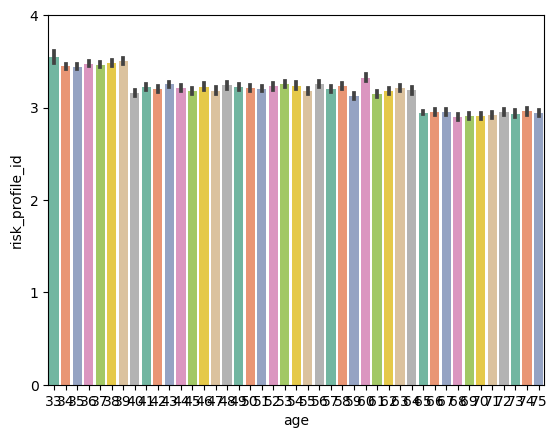

In [67]:
sns.barplot(x=df['age'], y=df['risk_profile_id'], data=df, palette="Set2")
plt.yticks(range(5))
plt.show()

In [73]:
# -- What is the relationship between available assets and risk category?

# select rp.Risk_Profile_ID, rp.Risk_Profile, avg(ca.total)
# from customer_assets2 ca
# join customer_answers qa on ca.customer_ID = qa.customer_ID
# join answers ans on qa.question_id = ans.question_id and qa.answer_id = ans.question_id
# join risk_profile rp on ans.Risk_Profile_ID = rp.Risk_Profile_ID
# group by rp.Risk_Profile_ID, rp.Risk_Profile
# order by rp.Risk_Profile_ID, rp.Risk_Profile;

In [75]:
df1 = pd.merge(customer_assets, customer_answers, on="customer_id")
df1 = pd.merge(df1, answers, on=["question_id", "answer_id"])
df1 = pd.merge(df1, risk_profile, on = 'risk_profile_id')
# df = df.groupby(["risk_profile_id", "risk_profile"]).agg({"age": "mean"})
# df = df.sort_values(["risk_profile_id", "risk_profile"])
print(df1.columns)

Index(['customer_id', 'asset_objective_id', 'total', 'question_id',
       'answer_id', 'answer_text', 'risk_profile_id', 'risk_profile'],
      dtype='object')


In [77]:
# select asset_objective_id, count(*) 
# from customer_assets2
# group by asset_objective_id
df2 = customer_assets.groupby("asset_objective_id").size()
print(df2)

asset_objective_id
1    10000
2    10000
3    10000
4    10000
5    10000
dtype: int64


In [79]:
# Import pandas library
import pandas as pd

# Read the customers and customer_assets tables from csv files
# customers = pd.read_csv("customers.csv")
# customer_assets = pd.read_csv("customer_assets.csv")

# Join the two tables on customer_id
joined = pd.merge(customers, customer_assets, on="customer_id")

# Filter out the rows where number_of_dependents > 0 and total < 100000
filtered = joined[(joined["number_of_dependents"] <= 0) | (joined["total"] >= 100000)]

# Group by the specified columns and calculate the average of total
grouped = filtered.groupby(["customer_id", "asset_objective_id", "number_of_dependents", "total"]).agg({"total": "mean"})

# Rename the columns
grouped.columns = ["avg_total"]

# Reset the index
grouped.reset_index(inplace=True)

# Sort by number_of_dependents
sorted = grouped.sort_values(by="number_of_dependents")

# Print the result
print(sorted.columns)


Index(['customer_id', 'asset_objective_id', 'number_of_dependents', 'total',
       'avg_total'],
      dtype='object')


<Axes: xlabel='asset_objective_id', ylabel='number_of_dependents'>

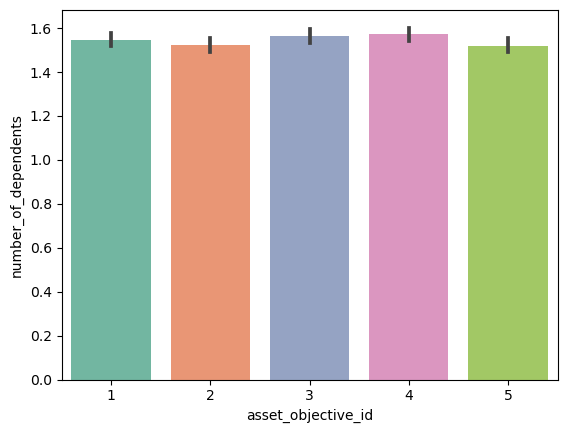

In [81]:
sns.barplot(x= sorted["asset_objective_id"], y= sorted["number_of_dependents"], data=sorted, palette="Set2")


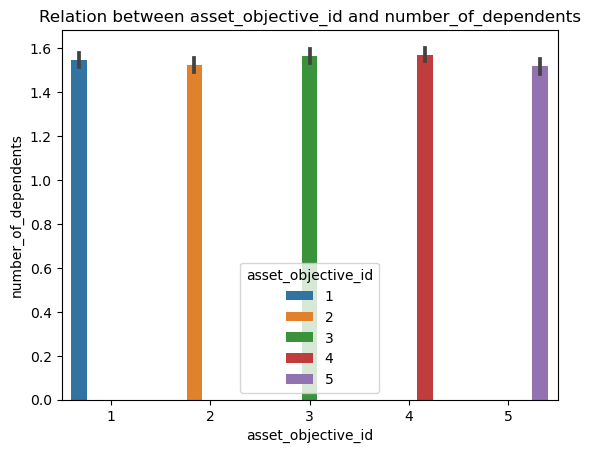

In [82]:
sns.barplot(data=df, x=sorted["asset_objective_id"], y=sorted["number_of_dependents"], hue=sorted["asset_objective_id"])
plt.title('Relation between asset_objective_id and number_of_dependents')
plt.show()

<Axes: xlabel='age', ylabel='number_of_dependents'>

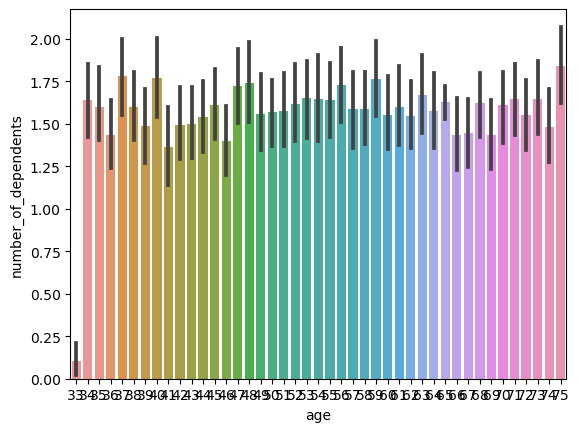

In [83]:
sns.barplot(data=df, x=customers['age'], y=customers['number_of_dependents'])

# sns.barplot(x=customers['age'], y=customers['number_of_dependents'], data=customers, palette="Set2")


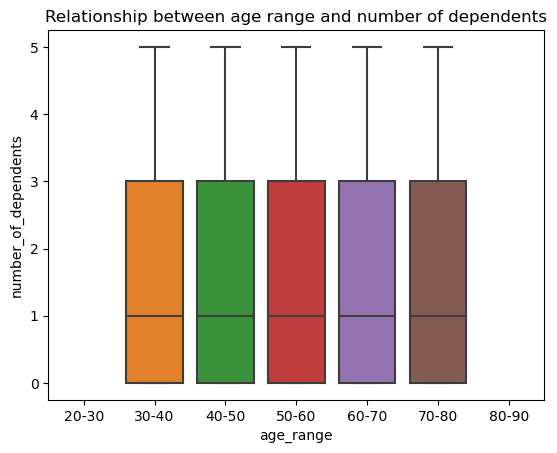

In [85]:
df = customers
df['age_range'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 70, 80, 90], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90'])
sns.boxplot(data=df, x='age_range', y='number_of_dependents')
plt.title('Relationship between age range and number of dependents')
plt.show()

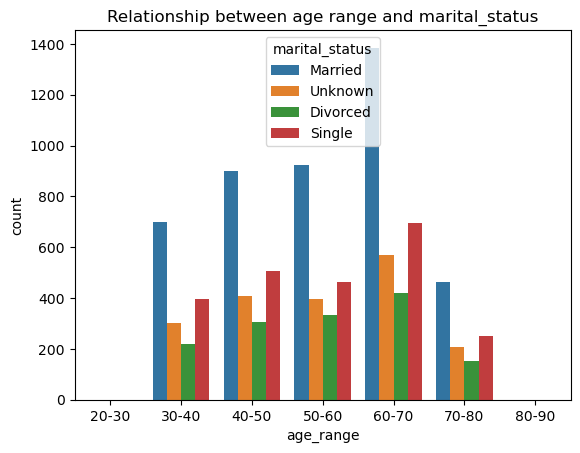

In [86]:
df = customers
df['age_range'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 70, 80, 90], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90'])
sns.countplot(data=df, x='age_range', hue='marital_status')
plt.title('Relationship between age range and marital_status')
plt.show()

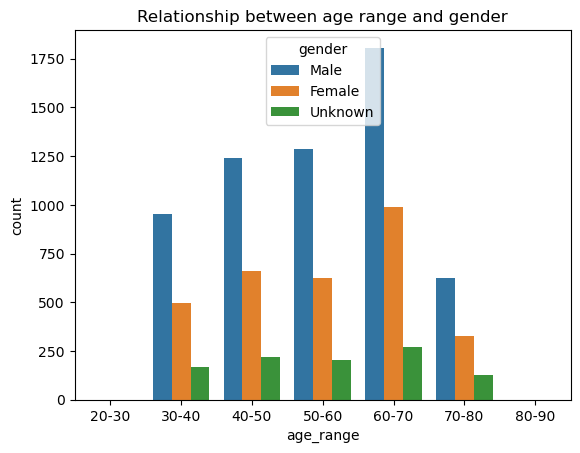

In [87]:
df = customers
df['age_range'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 70, 80, 90], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90'])
sns.countplot(data=df, x='age_range', hue='gender')
plt.title('Relationship between age range and gender')
plt.show()

In [89]:
df = customers
df['gender'] = df['gender'].fillna("unknown")

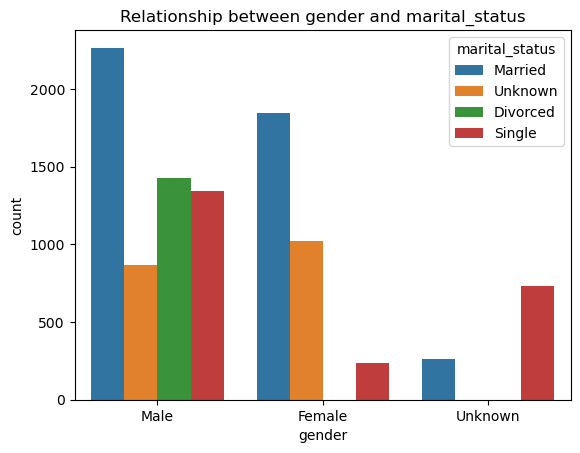

In [90]:
sns.countplot(data=df, x='gender', hue='marital_status')
plt.title('Relationship between gender and marital_status')
plt.show()

/tmp/ipykernel_96/3752285444.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_range'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 70, 80, 90], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90'])


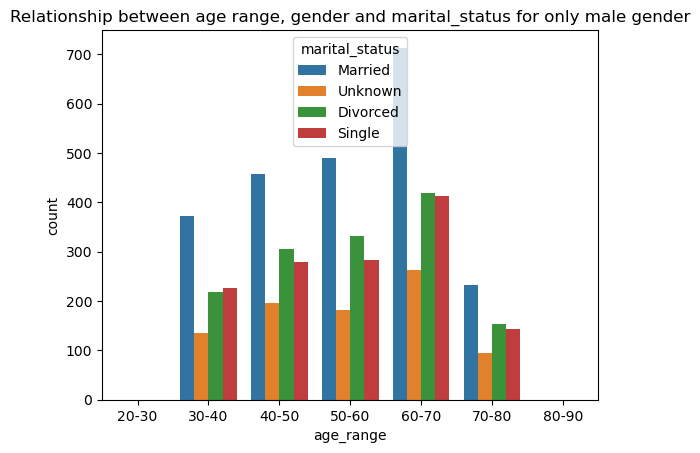

In [91]:
df = customers
df = df[df['gender'] == 'Male']
df['age_range'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 70, 80, 90], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90'])
sns.countplot(data=df, x='age_range', hue='marital_status')
plt.title('Relationship between age range, gender and marital_status for only male gender')
plt.show()

/tmp/ipykernel_96/3267530040.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_range'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 70, 80, 90], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90'])


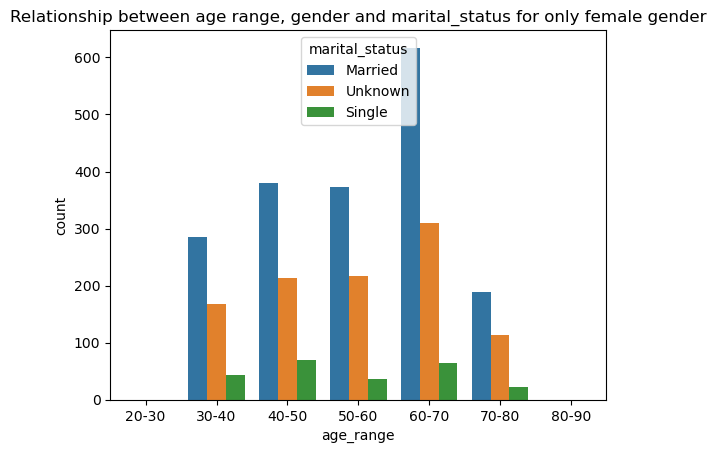

In [92]:
df = customers
df = df[df['gender'] == 'Female']
df['age_range'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 70, 80, 90], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90'])
sns.countplot(data=df, x='age_range', hue='marital_status')
plt.title('Relationship between age range, gender and marital_status for only female gender')
plt.show()

In [58]:
df = customers
df = df[df['gender'] == 'unknown']
df['age_range'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 70, 80, 90], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90'])
sns.countplot(data=df, x='age_range', hue='marital_status')
plt.title('Relationship between age range, gender and marital_status for only unknown gender')
plt.show()

ValueError: min() arg is an empty sequence

In [ ]:
# consider AGE 60-70 as ONE SEGMENT

In [ ]:
# age vs asssets
# gender vs assets
# martial vs assets
# geo vs assets
# asset vs marital_status

In [ ]:
import pandas as pd
from pandasql import sqldf
query = "select asset_objective_id, count(*) from customer_assets group by asset_objective_id"
result = sqldf(query)
print(result)

In [ ]:
query = "select asset_objective_id, sum(total) from customer_assets group by asset_objective_id order by sum(total) desc"
result = sqldf(query)
print(result)

In [ ]:
# # asset objective id 1, 3, 4 has max total amount invested
# 4 - retirement
# 3 - family planning
# 1 - general savings
# 5 - unknown
# 2 - home ownership

In [ ]:
# AGE 60-70
query = "select a.asset_objective_id, sum(a.total) from customer_assets a join customers c on a.customer_id = c.customer_id where c.age>60 and c.age<70 group by asset_objective_id order by sum(total) desc"
result = sqldf(query)
print(result)

In [ ]:
# AGE 30-40
query = "select a.asset_objective_id, sum(a.total) from customer_assets a join customers c on a.customer_id = c.customer_id where c.age>30 and c.age<40 group by asset_objective_id order by sum(total) desc"
result = sqldf(query)
print(result)

In [ ]:
# AGE 40-50
query = "select a.asset_objective_id, sum(a.total) from customer_assets a join customers c on a.customer_id = c.customer_id where c.age>40 and c.age<50 group by asset_objective_id order by sum(total) desc"
result = sqldf(query)
print(result)

In [ ]:
# AGE 50-60
query = "select a.asset_objective_id, sum(a.total) from customer_assets a join customers c on a.customer_id = c.customer_id where c.age>50 and c.age<60 group by asset_objective_id order by sum(total) desc"
result = sqldf(query)
print(result)

In [94]:
# plot for age and asset id 4 amount(total)

In [104]:
query = "select c.age, a.total from customer_assets a join customers c on a.customer_id = c.customer_id where a.asset_objective_id = 4 order by c.age"
result = sqldf(query)
print(result)

      age         total
0      33  1.089264e+04
1      33  1.770937e+06
2      33  1.475547e+05
3      33  2.242903e+06
4      33  1.484654e+06
...   ...           ...
9995   75  7.187422e+05
9996   75  3.325183e+06
9997   75  5.310614e+05
9998   75  2.940355e+06
9999   75  1.393821e+06

[10000 rows x 2 columns]


In [107]:
plt.plot(l1['age'], l1['total'] / 1e+06)

NameError: name 'l1' is not defined

In [ ]:
result['age'] 
l1 = result[ result['age']>70]

In [ ]:
l1

In [ ]:
plt.scatter(l1['age'], l1['total'] / 1e+06)

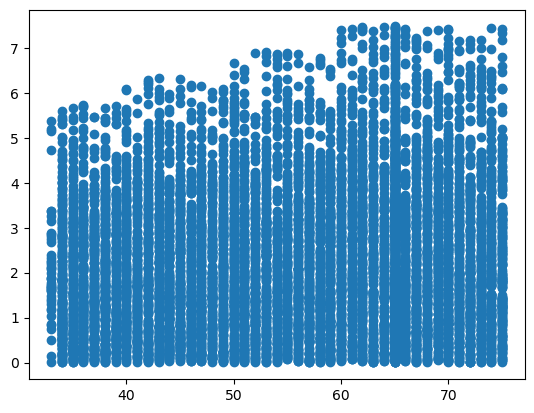

In [109]:
plt.scatter(result['age'], result['total'] / 1e+06)

      age        total
0      33  1176869.520
1      33   755283.744
2      33  1166740.992
3      33   257230.620
4      33   362146.410
...   ...          ...
9995   75  2568090.096
9996   75  2000563.461
9997   75  1751159.592
9998   75  2990026.494
9999   75  3029330.304

[10000 rows x 2 columns]


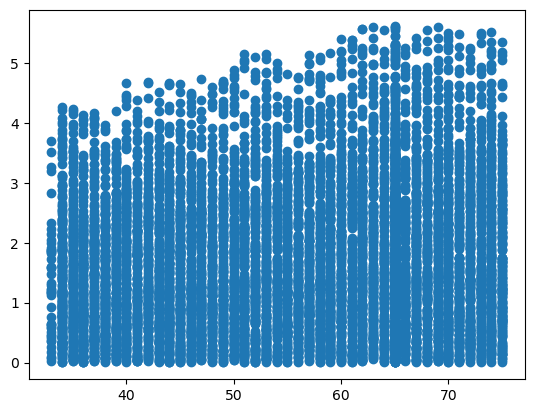

In [114]:
query = "select c.age, a.total from customer_assets a join customers c on a.customer_id = c.customer_id where a.asset_objective_id = 3 order by c.age"
result = sqldf(query)
print(result)
plt.scatter(result['age'], result['total'] / 1e+06)

In [115]:
# POTENTIAL SEGMENTS
# 1. CUSTOMERS AGE 40-50 (2nd highest)
# 2. AGE 50-60
# 3. AGE 60-70 (highest)
# 4. MALE MARRIED (highest)
# 5. MALE DIVORCED 
# 6. RETIREMENT (priority)
# 7. FAMILY PLANNING
# 8. SAVINGS

In [60]:
# risk score part

In [86]:
merged_df=pd.merge(customer_answers,answers,on=['question_id','answer_id'],how='outer')

In [88]:
merged_df.sort_values(by='customer_id',inplace=True)

In [90]:
merged_df

,customer_id,question_id,answer_id,answer_text,risk_profile_id
0,1,1,2,5-10 Years,2.0
30000,1,4,2,I have an emergency fund as well,2.0
40000,1,5,1,Increase significantly,5.0
50000,1,6,3,Take a little risk with a small portion of the...,3.0
70000,1,8,1,NaN,NaN
...,...,...,...,...,...
65513,10000,7,1,I don’t monitor my investment accounts and I d...,5.0
37762,10000,4,1,It’s all I have,1.0
42863,10000,5,1,Increase significantly,5.0
7716,10000,1,1,1-5 Years,1.0


In [92]:
merged_df.dropna(inplace=True)

In [93]:
merged_df

,customer_id,question_id,answer_id,answer_text,risk_profile_id
0,1,1,2,5-10 Years,2.0
30000,1,4,2,I have an emergency fund as well,2.0
40000,1,5,1,Increase significantly,5.0
50000,1,6,3,Take a little risk with a small portion of the...,3.0
60000,1,7,3,I review my statements regularly,3.0
...,...,...,...,...,...
65513,10000,7,1,I don’t monitor my investment accounts and I d...,5.0
37762,10000,4,1,It’s all I have,1.0
42863,10000,5,1,Increase significantly,5.0
7716,10000,1,1,1-5 Years,1.0


In [96]:
avg_score=merged_df.groupby('customer_id')['risk_profile_id'].mean()

In [98]:
avg_score

customer_id
1        2.833333
2        4.000000
3        3.000000
4        2.833333
5        2.833333
           ...   
9996     3.142857
9997     2.857143
9998     2.833333
9999     2.833333
10000    2.833333
Name: risk_profile_id, Length: 10000, dtype: float64

In [100]:
score_dict=avg_score.to_dict()

In [102]:
query = "select customer_id, avg(risk_profile_id) as risk_score from merged_df group by customer_id"
result = sqldf(query)
print(result)

      customer_id  risk_score
0               1    2.833333
1               2    4.000000
2               3    3.000000
3               4    2.833333
4               5    2.833333
...           ...         ...
9995         9996    3.142857
9996         9997    2.857143
9997         9998    2.833333
9998         9999    2.833333
9999        10000    2.833333

[10000 rows x 2 columns]


In [103]:
query = "select a.customer_id, a.age, a.gender, a.marital_status, a.number_of_dependents, b.risk_score from customers a join result b on a.customer_id = b.customer_id"
result = sqldf(query)
print(result)

      customer_id  age   gender marital_status  number_of_dependents  \
0               1   65     Male        Married                     0   
1               2   65     Male        Married                     0   
2               3   65     Male        Unknown                     0   
3               4   65   Female        Married                     0   
4               5   65   Female        Married                     0   
...           ...  ...      ...            ...                   ...   
9995         9996   75     Male        Married                     0   
9996         9997   75  Unknown         Single                     0   
9997         9998   75  Unknown        Married                     0   
9998         9999   75  Unknown         Single                     0   
9999        10000   75  Unknown        Married                     0   

      risk_score  
0       2.833333  
1       4.000000  
2       3.000000  
3       2.833333  
4       2.833333  
...          ...  
99

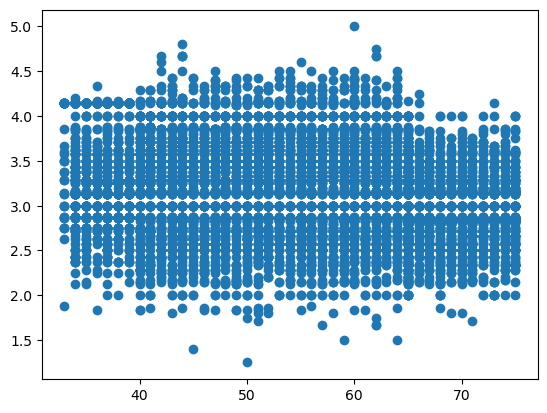

In [105]:
plt.scatter(result['age'], result['risk_score'])

<BarContainer object of 10000 artists>

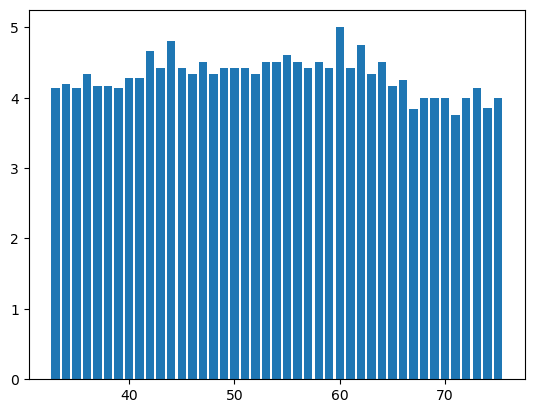

In [107]:
plt.bar(result['age'], result['risk_score'])

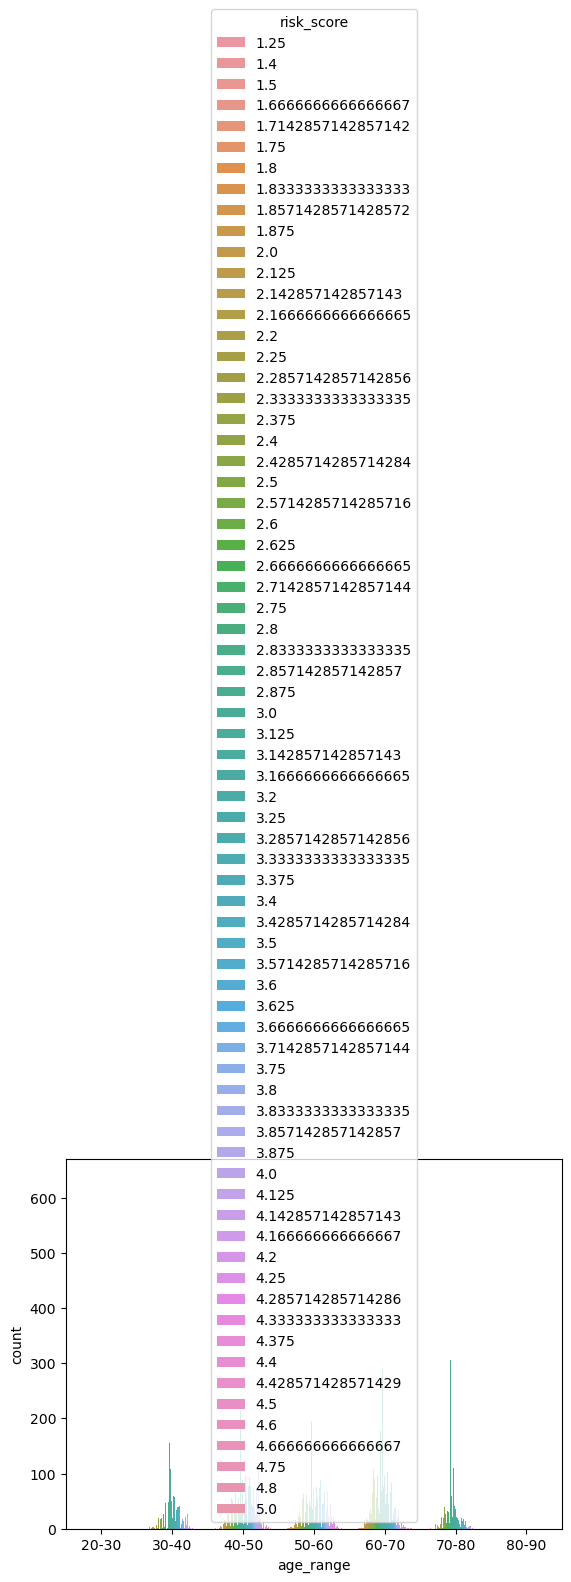

In [109]:
df = result
df['age_range'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 70, 80, 90], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90'])
sns.countplot(data=df, x='age_range', hue='risk_score')
plt.show()

In [110]:
query = "select max(risk_score), min(risk_score) from result"
sqldf(query)


,max(risk_score),min(risk_score)
0,5.0,1.25


<Axes: xlabel='age_range', ylabel='risk_score'>

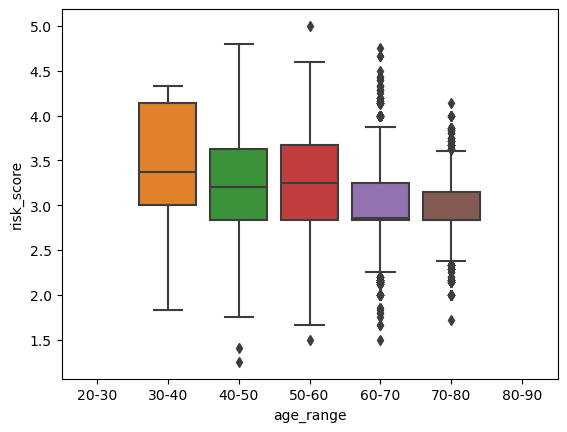

In [111]:
df['age_range'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 70, 80, 90], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90'])
sns.boxplot(x='age_range', y='risk_score', data=df)


In [112]:
df.head()

,customer_id,age,gender,marital_status,number_of_dependents,risk_score,age_range
0,1,65,Male,Married,0,2.833333,60-70
1,2,65,Male,Married,0,4.000000,60-70
2,3,65,Male,Unknown,0,3.000000,60-70
3,4,65,Female,Married,0,2.833333,60-70
4,5,65,Female,Married,0,2.833333,60-70


In [113]:
query = "select max(number_of_dependents), min(number_of_dependents) from result"
sqldf(query)

,max(number_of_dependents),min(number_of_dependents)
0,5,0


<Axes: xlabel='dpnt_range', ylabel='risk_score'>

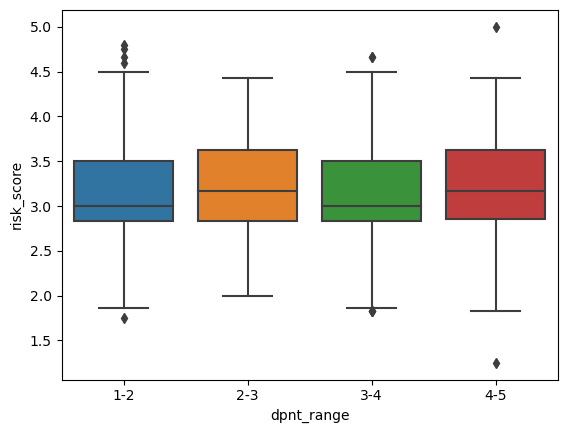

In [90]:
df['dpnt_range'] = pd.cut(df['number_of_dependents'], bins=[1,2,3,4,5], labels=['1-2', '2-3', '3-4', '4-5'])
sns.boxplot(x='dpnt_range', y='risk_score', data=df)

<Axes: xlabel='risk_score_bin', ylabel='count'>

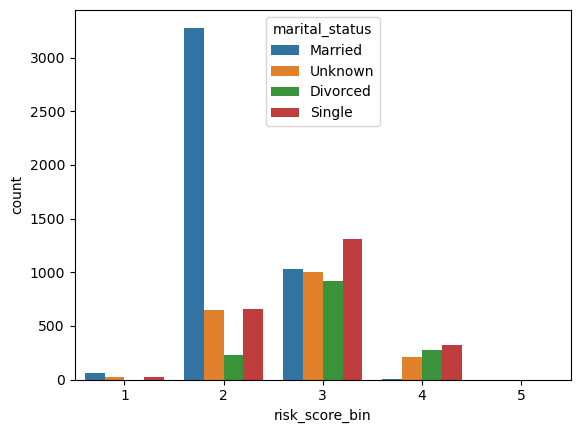

In [91]:
bins = [1, 2, 3, 4, 5, 6] 
labels = ['1', '2', '3', '4', '5']
df['risk_score_bin'] = pd.cut(df['risk_score'], bins=bins, labels=labels)
# df.groupby(['risk_score_bin', 'marital_status']).size().unstack().plot(kind='bar', stacked=True)
sns.countplot(data=df, x='risk_score_bin', hue='marital_status')

<Axes: xlabel='risk_score_bin', ylabel='count'>

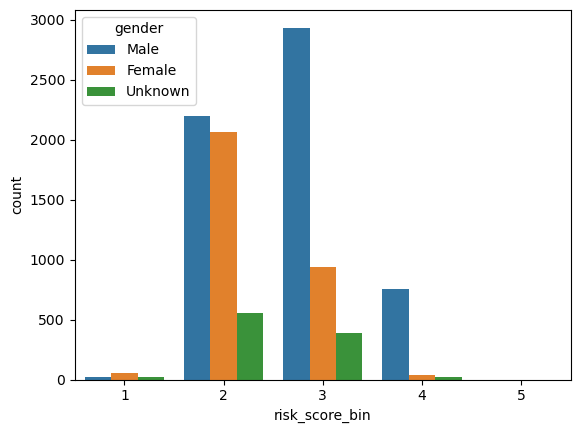

In [92]:
bins = [1, 2, 3, 4, 5, 6] 
labels = ['1', '2', '3', '4', '5']
df['risk_score_bin'] = pd.cut(df['risk_score'], bins=bins, labels=labels)
# df.groupby(['risk_score_bin', 'marital_status']).size().unstack().plot(kind='bar', stacked=True)
sns.countplot(data=df, x='risk_score_bin', hue='gender')

In [93]:
query1 = "select a.customer_id, a.age, a.gender, a.marital_status, a.number_of_dependents, sum(b.total) from customers a join customer_assets b on a.customer_id = b.customer_id"
result1 = sqldf(query1)
print(result1)

   customer_id  age gender marital_status  number_of_dependents  sum(b.total)
0            1   65   Male        Married                     0  6.240110e+10


In [94]:
customers

,customer_id,contact_last_name,contact_first_name,street,city,state,zip,country,age,marital_status,gender,number_of_dependents
0,1,Chaney,Jemima,5584 Orci Street,Lexington,Kentucky,36751,United States,65,Married,Male,0
1,2,Collins,Colt,"P.O. Box 643, 8508 At, St.",Boston,Massachusetts,25388,United States,65,Married,Male,0
2,3,Crawford,Glenna,"P.O. Box 890, 8204 Lectus Rd.",Milwaukee,Wisconsin,33343,United States,65,Unknown,Male,0
3,4,Fisher,Sophia,Ap #274-5091 Vel Avenue,Salem,Oregon,90464,United States,65,Married,Female,0
4,5,Gonzales,Evan,798-923 Ante Street,Olympia,Washington,82930,United States,65,Married,Female,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,Yates,Hedwig,779-9733 Mollis Street,Cleveland,Ohio,10039,United States,75,Married,Male,0
9996,9997,Barron,Evelyn,691-6505 Tellus Ave,Wilmington,Delaware,79615,United States,75,Single,Unknown,0
9997,9998,Contreras,Chester,735-8568 Proin St.,Cambridge,Massachusetts,45051,United States,75,Married,Unknown,0
9998,9999,Walters,Channing,"P.O. Box 232, 226 Eget, St.",Eugene,Oregon,88735,United States,75,Single,Unknown,0


In [95]:
customer_assets

,customer_id,asset_objective_id,total
0,1,1,1.157902e+05
1,2,1,1.991070e+06
2,3,1,1.569350e+06
3,4,1,2.162568e+06
4,5,1,1.366450e+06
...,...,...,...
49995,9996,5,1.140434e+06
49996,9997,5,9.750851e+05
49997,9998,5,2.611883e+05
49998,9999,5,6.397328e+05


In [96]:
q = "select a.customer_id, a.age, a.gender, a.marital_status, a.number_of_dependents, sum(b.total) as total from customers a join customer_assets b on a.customer_id = b.customer_id group by a.customer_id"
res1 = sqldf(q)

In [97]:
res1

,customer_id,age,gender,marital_status,number_of_dependents,total
0,1,65,Male,Married,0,3.715898e+06
1,2,65,Male,Married,0,7.230893e+06
2,3,65,Male,Unknown,0,5.871863e+06
3,4,65,Female,Married,0,1.274188e+07
4,5,65,Female,Married,0,8.836557e+06
...,...,...,...,...,...,...
9995,9996,75,Male,Married,0,7.234247e+06
9996,9997,75,Unknown,Single,0,9.216708e+06
9997,9998,75,Unknown,Married,0,5.511694e+06
9998,9999,75,Unknown,Single,0,7.213900e+06


<Axes: xlabel='dpnt_range', ylabel='total'>

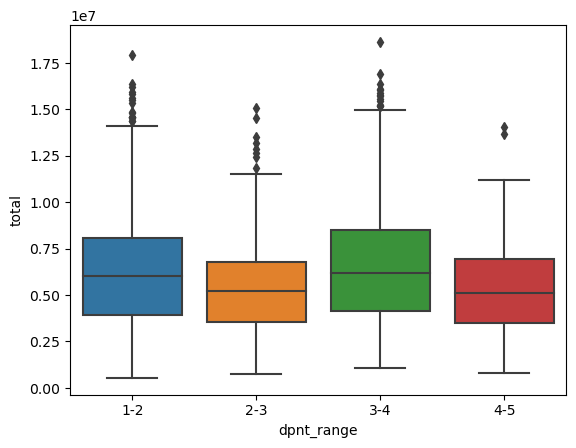

In [98]:
df = res1
df['dpnt_range'] = pd.cut(df['number_of_dependents'], bins=[1,2,3,4,5], labels=['1-2', '2-3', '3-4', '4-5'])
sns.boxplot(x='dpnt_range', y='total', data=df)

<Axes: xlabel='marital_status', ylabel='total'>

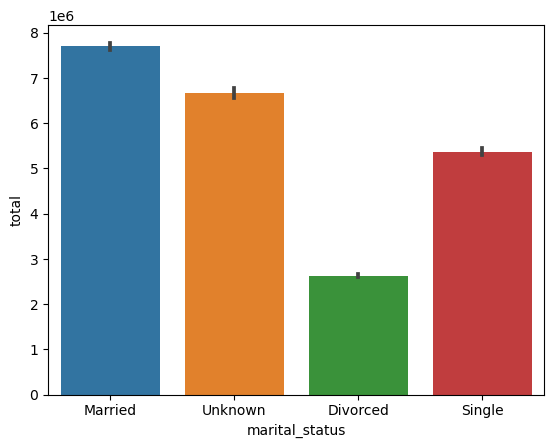

In [99]:
sns.barplot(data=df, x='marital_status', y='total')

<Axes: xlabel='gender', ylabel='total'>

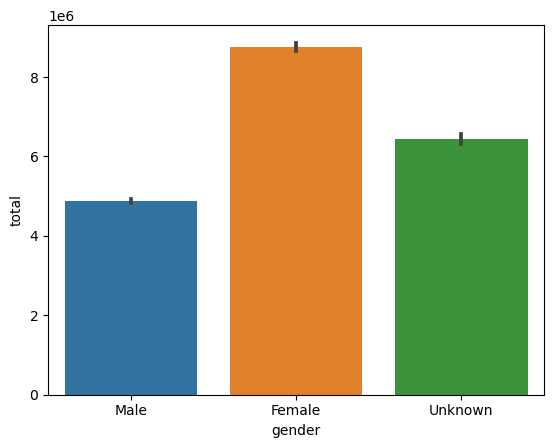

In [100]:
sns.barplot(data=df, x='gender', y='total')

In [103]:
q = "select a.customer_id, a.age, a.gender, a.marital_status, a.number_of_dependents, sum(b.total) as total, c.risk_score from customers a join customer_assets b on a.customer_id = b.customer_id join result c on b.customer_id = c.customer_id group by a.customer_id"
res2 = sqldf(q)
res2

,customer_id,age,gender,marital_status,number_of_dependents,total,risk_score
0,1,65,Male,Married,0,3.715898e+06,2.833333
1,2,65,Male,Married,0,7.230893e+06,4.000000
2,3,65,Male,Unknown,0,5.871863e+06,3.000000
3,4,65,Female,Married,0,1.274188e+07,2.833333
4,5,65,Female,Married,0,8.836557e+06,2.833333
...,...,...,...,...,...,...,...
9995,9996,75,Male,Married,0,7.234247e+06,3.142857
9996,9997,75,Unknown,Single,0,9.216708e+06,2.857143
9997,9998,75,Unknown,Married,0,5.511694e+06,2.833333
9998,9999,75,Unknown,Single,0,7.213900e+06,2.833333


In [104]:
df = res2

<Axes: xlabel='gender', ylabel='risk_score'>

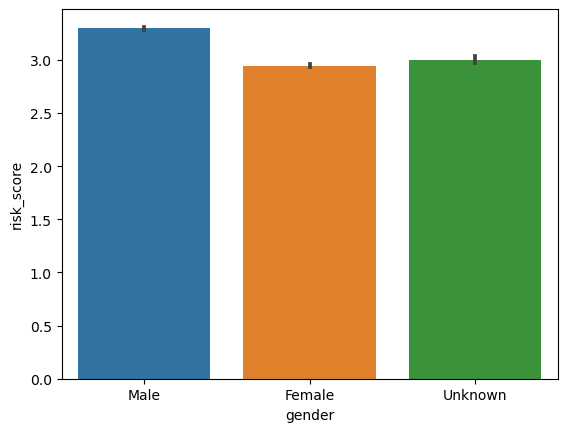

In [105]:
sns.barplot(data=df, x='gender', y='risk_score')

<Axes: xlabel='marital_status', ylabel='risk_score'>

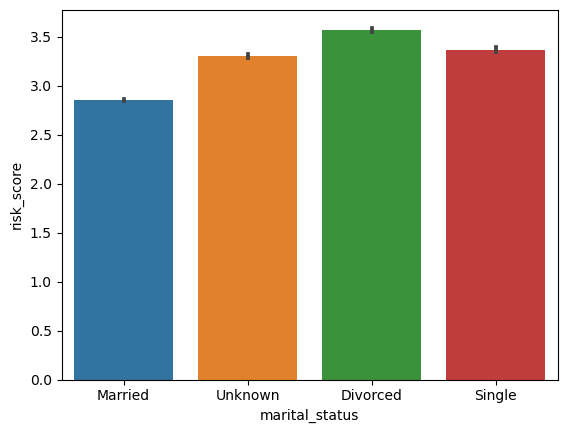

In [106]:
sns.barplot(data=df, x='marital_status', y='risk_score')

<Axes: xlabel='dpnt_range', ylabel='risk_score'>

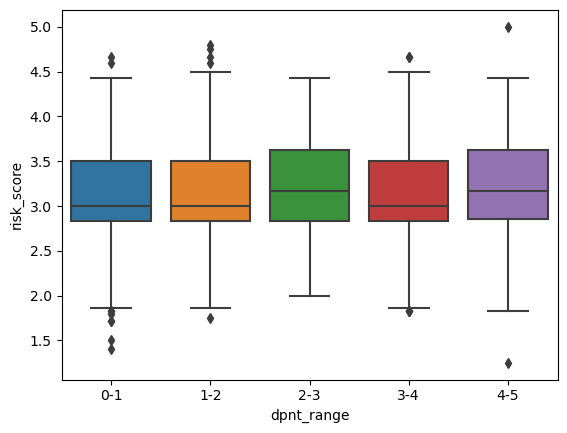

In [107]:
# df = res1
df['dpnt_range'] = pd.cut(df['number_of_dependents'], bins=[0,1,2,3,4,5], labels=['0-1','1-2', '2-3', '3-4', '4-5'])
sns.boxplot(x='dpnt_range', y='risk_score', data=df)

<Axes: xlabel='dpnt_range', ylabel='risk_score'>

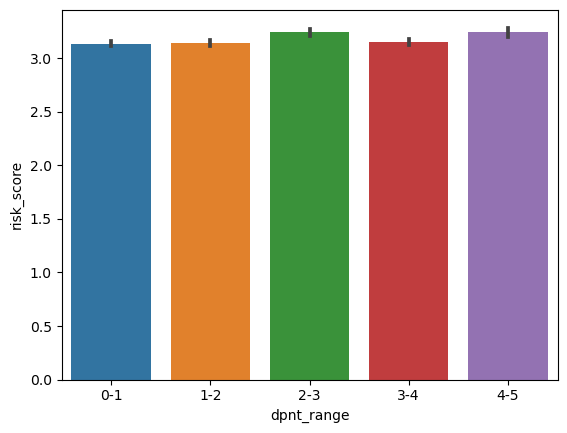

In [108]:
sns.barplot(x='dpnt_range', y='risk_score', data=df)

<Axes: xlabel='total', ylabel='risk_score'>

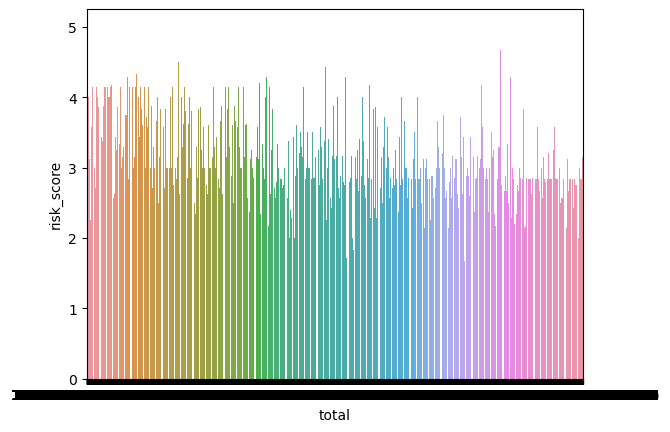

In [109]:
sns.barplot(x='total', y='risk_score', data=df)

<Axes: xlabel='total', ylabel='risk_score'>

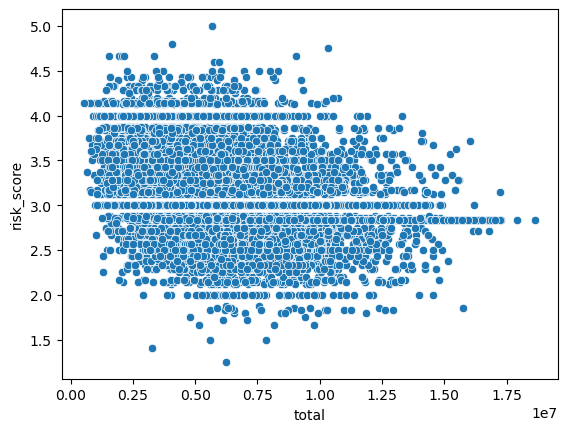

In [110]:
sns.scatterplot(x='total', y='risk_score', data=df)

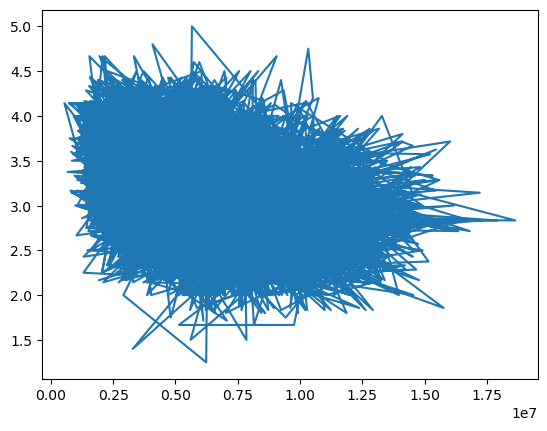

In [111]:
plt.plot('total', 'risk_score', data=df)

In [112]:
df

,customer_id,age,gender,marital_status,number_of_dependents,total,risk_score,dpnt_range
0,1,65,Male,Married,0,3.715898e+06,2.833333,NaN
1,2,65,Male,Married,0,7.230893e+06,4.000000,NaN
2,3,65,Male,Unknown,0,5.871863e+06,3.000000,NaN
3,4,65,Female,Married,0,1.274188e+07,2.833333,NaN
4,5,65,Female,Married,0,8.836557e+06,2.833333,NaN
...,...,...,...,...,...,...,...,...
9995,9996,75,Male,Married,0,7.234247e+06,3.142857,NaN
9996,9997,75,Unknown,Single,0,9.216708e+06,2.857143,NaN
9997,9998,75,Unknown,Married,0,5.511694e+06,2.833333,NaN
9998,9999,75,Unknown,Single,0,7.213900e+06,2.833333,NaN


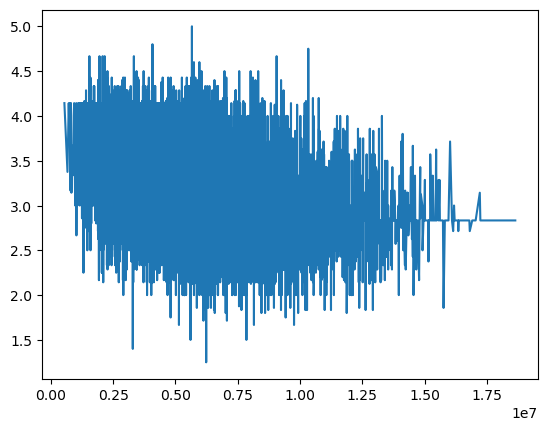

In [113]:
df = df.sort_values('total')
plt.plot(df['total'],df['risk_score'])

<BarContainer object of 10000 artists>

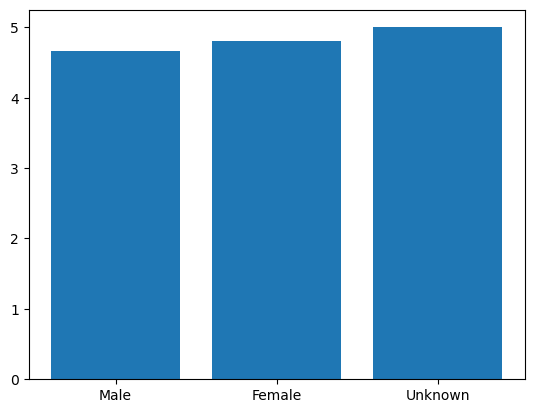

In [114]:
df = df.sort_values('total')
plt.bar(df['gender'],df['risk_score'])

In [115]:
arr1 = df.groupby('age')['risk_score'].mean()
arr1

age
33    3.577102
34    3.467002
35    3.459207
36    3.493734
37    3.489717
38    3.507815
39    3.519694
40    3.152796
41    3.210720
42    3.208415
43    3.248431
44    3.218790
45    3.169772
46    3.231319
47    3.193338
48    3.241716
49    3.216964
50    3.204478
51    3.200133
52    3.224767
53    3.259695
54    3.234690
55    3.184524
56    3.260560
57    3.201586
58    3.232412
59    3.123057
60    3.333053
61    3.149373
62    3.193834
63    3.207894
64    3.191568
65    2.941345
66    2.951399
67    2.948634
68    2.895669
69    2.909630
70    2.914353
71    2.912823
72    2.943037
73    2.936189
74    2.955393
75    2.934490
Name: risk_score, dtype: float64

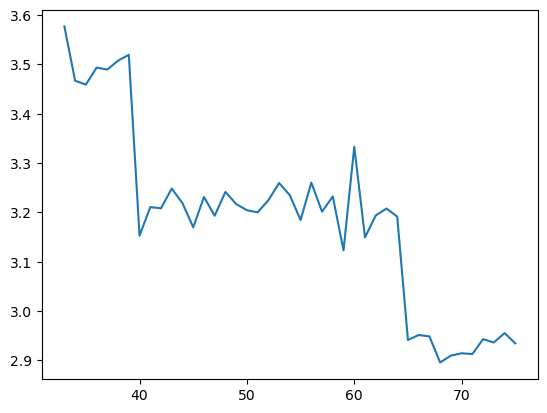

In [116]:
plt.plot(arr1)

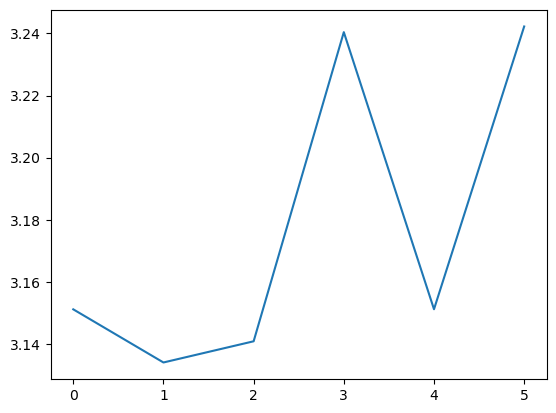

In [117]:
arr2 = df.groupby('number_of_dependents')['risk_score'].mean()
plt.plot(arr2)

In [120]:
score_dict=avg_score.to_dict()
risk_score_df=pd.DataFrame(score_dict.items(), columns=['customer_ID', 'Risk_Score'])
risk_score_df

,customer_ID,Risk_Score
0,1,2.833333
1,2,4.000000
2,3,3.000000
3,4,2.833333
4,5,2.833333
...,...,...
9995,9996,3.142857
9996,9997,2.857143
9997,9998,2.833333
9998,9999,2.833333


In [122]:
wealth_investor_constraint=risk_score_df[risk_score_df['Risk_Score']>=2]
wealth_investor_constraint=risk_score_df[risk_score_df['Risk_Score']<=4]
risk_score_counts = wealth_investor_constraint['Risk_Score'].value_counts()
risk_score_counts

2.833333    1051
3.000000     962
2.857143     443
3.142857     386
3.285714     359
3.500000     332
4.000000     307
2.500000     284
3.125000     283
2.714286     280
3.428571     275
3.571429     268
3.166667     257
2.571429     252
2.875000     238
3.250000     229
3.714286     205
3.857143     203
3.333333     197
2.666667     188
3.375000     179
2.750000     179
2.428571     171
2.625000     149
3.666667     149
3.625000     146
3.750000     123
2.333333     112
3.833333      99
2.285714      99
3.200000      90
2.375000      87
3.875000      68
2.142857      62
2.000000      61
2.800000      53
2.250000      46
3.600000      46
2.166667      46
2.600000      37
3.400000      34
3.800000      31
2.125000      27
2.400000      25
2.200000      22
1.833333      12
1.857143       7
1.800000       6
1.666667       3
1.875000       2
1.750000       2
1.714286       2
1.500000       2
1.400000       1
1.250000       1
Name: Risk_Score, dtype: int64

/tmp/ipykernel_555/3530079461.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['risk_score_range'] = pd.cut(data['Risk_Score'], bins=[2, 3, 4], labels=labels, right=False)


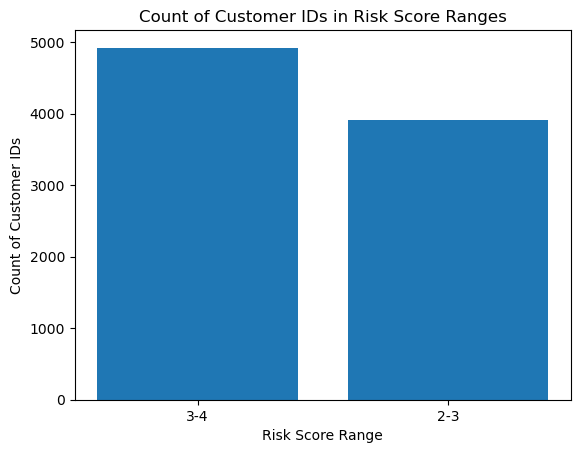

Summary Statistics of Risk Scores:
count    9178.000000
mean        3.068075
std         0.455969
min         1.250000
25%         2.833333
50%         3.000000
75%         3.375000
max         4.000000
Name: Risk_Score, dtype: float64
Proportion of Customers with Risk Score > 3: 0.4648071475266943


In [124]:
import pandas as pd

import matplotlib.pyplot as plt

data=wealth_investor_constraint

ranges = [(2, 3), (3, 4)]

labels = ['2-3', '3-4']

 
data['risk_score_range'] = pd.cut(data['Risk_Score'], bins=[2, 3, 4], labels=labels, right=False)

 


risk_score_counts = data['risk_score_range'].value_counts()

 


plt.bar(risk_score_counts.index, risk_score_counts.values)

plt.xlabel('Risk Score Range')

plt.ylabel('Count of Customer IDs')

plt.title('Count of Customer IDs in Risk Score Ranges')

plt.show()

 

# Calculate summary statistics of the risk scores

risk_score_summary = data['Risk_Score'].describe()

print("Summary Statistics of Risk Scores:")

print(risk_score_summary)

 

# Calculate the proportion of customers with a risk score greater than 3

proportion_above_3 = (data['Risk_Score'] > 3).mean()

print("Proportion of Customers with Risk Score > 3:", proportion_above_3)

Customer with Max Asset: 718
 Asset: customer_id
1     3.715898e+06
2     7.230893e+06
3     5.871863e+06
4     1.274188e+07
5     8.836557e+06
6     8.818253e+06
7     1.259432e+07
8     8.972242e+06
9     6.891288e+06
10    1.041533e+07
Name: total, dtype: float64


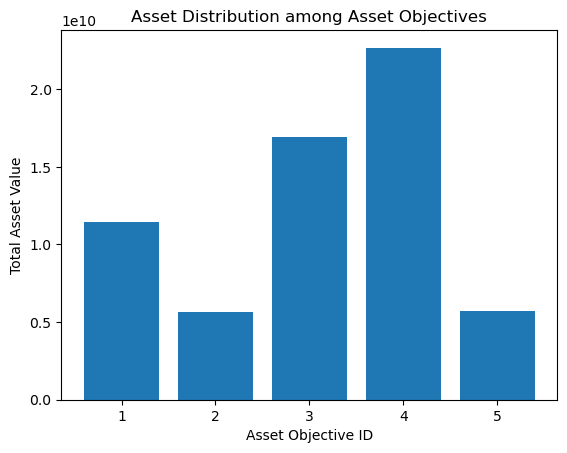

In [163]:
# Analysis of Customer Asset Vs Objectives
import matplotlib.pyplot as plt

 
# Customer with Max Asset

max_asset_customer = customer_assets.groupby('customer_id')['total'].sum().idxmax()

 

print("Customer with Max Asset:", max_asset_customer)

max_asset_customer2 = customer_assets.groupby('customer_id')['total'].sum()

 

print(" Asset:", max_asset_customer2[:10])

 

# Asset Distribution among Asset Objectives

asset_distribution = customer_assets.groupby('asset_objective_id')['total'].sum()

 

# bar chart to visualize the distribution

plt.bar(asset_distribution.index, asset_distribution.values)

plt.xlabel('Asset Objective ID')

plt.ylabel('Total Asset Value')

plt.title('Asset Distribution among Asset Objectives')

plt.show()

In [179]:
customers.head(1)

,customer_id,contact_last_name,contact_first_name,street,city,state,zip,country,age,marital_status,gender,number_of_dependents
0,1,Chaney,Jemima,5584 Orci Street,Lexington,Kentucky,36751,United States,65,Married,Male,0


In [183]:
risk_score_df.columns = risk_score_df.columns.str.lower()

In [185]:
risk_score_df.head(1)

,customer_id,risk_score
0,1,2.833333


In [189]:
customer_merged_df=pd.merge(customers,risk_score_df,on=['customer_id'],how='inner')
customer_merged_df.head(1)

,customer_id,contact_last_name,contact_first_name,street,city,state,zip,country,age,marital_status,gender,number_of_dependents,risk_score
0,1,Chaney,Jemima,5584 Orci Street,Lexington,Kentucky,36751,United States,65,Married,Male,0,2.833333


correlation-coefficient between risk_score and number_of_dependents is 0.04


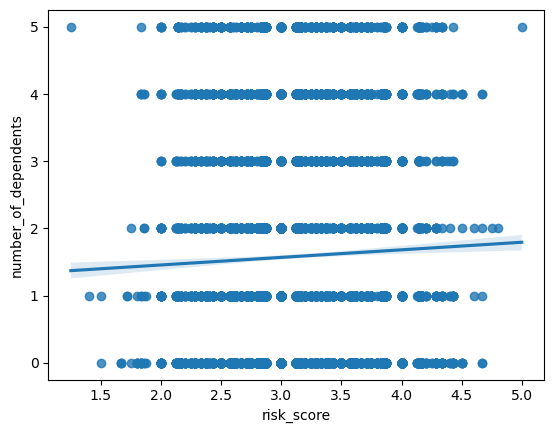

In [195]:
import seaborn as sns
import matplotlib.pyplot as plt

x='number_of_dependents'
y='risk_score'

corr = customer_merged_df[y].corr(customer_merged_df[x])

print(f"correlation-coefficient between {y} and {x} is {corr:.2f}")

sns.regplot(x=y, y=x, data=customer_merged_df)
plt.show()


0.0370633490371308


/tmp/ipykernel_97/2655903332.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(customer_merged_df.corr()[x][y])


<Axes: xlabel='number_of_dependents', ylabel='risk_score'>

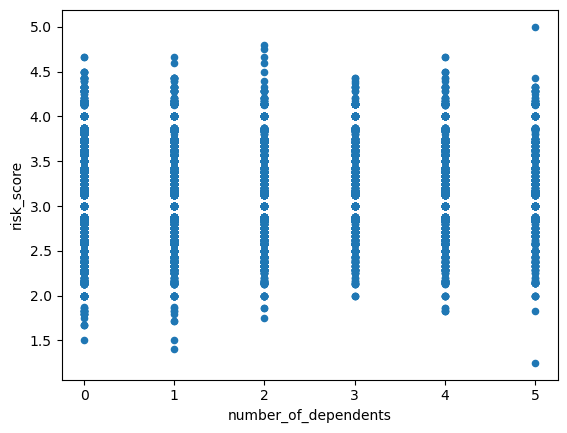

In [197]:
print(customer_merged_df.corr()[x][y])

customer_merged_df.plot.scatter(x=x,y=y)

In [199]:
correlation_matrix = customer_merged_df.corr()
correlation = correlation_matrix.loc[x, y]
print(correlation)

0.0370633490371308


/tmp/ipykernel_97/1284129377.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = customer_merged_df.corr()


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

In [207]:
### outlier analysis based on total_asset vs no of dependents for ASSET ID 4
# Create views DA1 and DA2 by selecting and filtering columns
DA1 = customers[["customer_id", "number_of_dependents"]]
DA2 = customer_assets[customer_assets["asset_objective_id"] == 4]
# Create view DA3 by joining DA1 and DA2 on customer_ID and filtering by number_of_dependents = 1
DA3 = DA1.merge(DA2, on="customer_id", how="inner")
#DA3 = DA3[DA3["number_of_dependents"] == 1]

In [211]:
DA3.head()

,customer_id,number_of_dependents,asset_objective_id,total
0,1,0,4,1.115145e+06
1,2,0,4,5.838938e+05
2,3,0,4,2.371445e+06
3,4,0,4,4.363542e+06
4,5,0,4,3.260136e+06


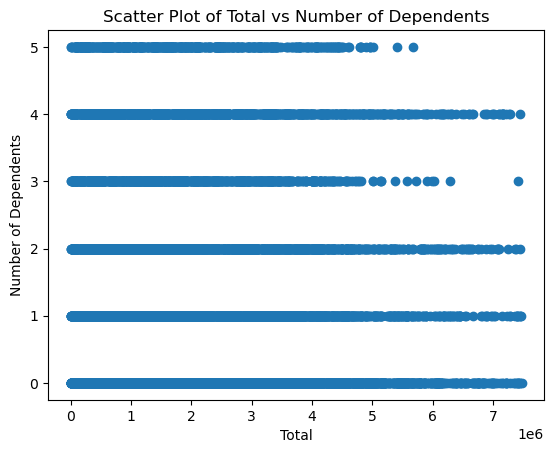

In [213]:
### plot scatter plot

import matplotlib.pyplot as plt

# Create a scatter plot of total vs number_of_dependents
plt.scatter(DA3["total"], DA3["number_of_dependents"])

# Add labels and title
plt.xlabel("Total")
plt.ylabel("Number of Dependents")
plt.title("Scatter Plot of Total vs Number of Dependents")

# Show the plot
plt.show()

In [215]:
z = stats.zscore(DA3["total"])

cleaned34 = DA3 [np.abs (z) < 3]
outliers3=DA3 [np.abs (z) >= 3]
#fig, (ax1, ax2) = plt.subplots(1, 2)
print(len(outliers3))

50


42


Text(0.5, 1.0, 'only outliers')

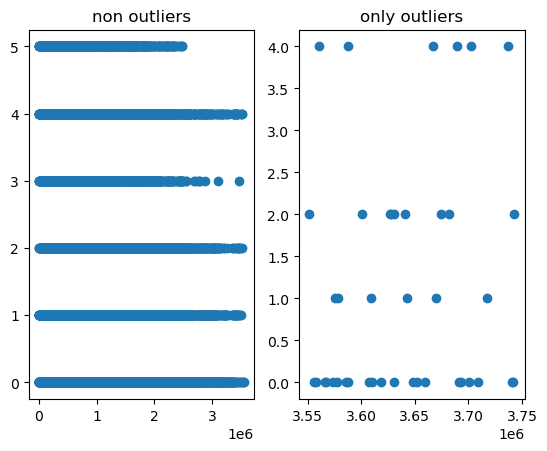

In [50]:

### outlier analysis based on total_asset vs no of dependents for ASSET ID 1

# Create views DA1 and DA2 by selecting and filtering columns
DA1 = customers[["customer_id", "number_of_dependents"]]
DA2 = customer_assets[customer_assets["asset_objective_id"] == 1]

# Create view DA3 by joining DA1 and DA2 on customer_ID and filtering by number_of_dependents = 1
DA3 = DA1.merge(DA2, on="customer_id", how="inner")
#DA3 = DA3[DA3["number_of_dependents"] == 1]



#perform outlier analysis using zscore
z = stats.zscore(DA3["total"])

cleaned1 = DA3[np.abs (z) <= 3]
outliers1=DA3 [np.abs (z) >= 3]
#fig, (ax1, ax2) = plt.subplots(1, 2)
print(len(outliers1))


import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1

# Create a scatter plot of total vs number_of_dependents
#plt.scatter(outliers1["total"], outliers1["number_of_dependents"])
#plt.scatter(cleaned1["total"], cleaned1["number_of_dependents"])

# something i just tried so ignore if wrong

# Add labels and title
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.scatter(cleaned1["total"], cleaned1["number_of_dependents"])
ax1.set_title("non outliers")
ax2.scatter(outliers1["total"], outliers1["number_of_dependents"])
ax2.set_title("only outliers")



42


Text(0.5, 1.0, 'only outliers')

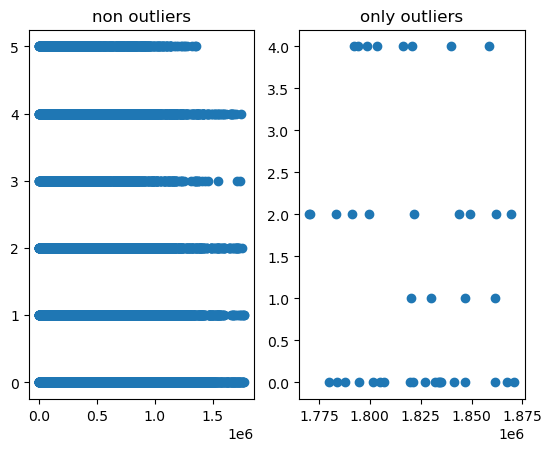

In [51]:

### outlier analysis based on total_asset vs no of dependents for ASSET ID 2

# Create views DA1 and DA2 by selecting and filtering columns
DA1 = customers[["customer_id", "number_of_dependents"]]
DA2 = customer_assets[customer_assets["asset_objective_id"] == 2]

# Create view DA3 by joining DA1 and DA2 on customer_ID and filtering by number_of_dependents = 1
DA3 = DA1.merge(DA2, on="customer_id", how="inner")
#DA3 = DA3[DA3["number_of_dependents"] == 1]



#perform outlier analysis using zscore
z = stats.zscore(DA3["total"])

cleaned2 = DA3[np.abs (z) <= 3]
outliers2=DA3 [np.abs (z) >= 3]
#fig, (ax1, ax2) = plt.subplots(1, 2)
print(len(outliers2))


import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1

# Create a scatter plot of total vs number_of_dependents
#plt.scatter(outliers1["total"], outliers1["number_of_dependents"])
#plt.scatter(cleaned1["total"], cleaned1["number_of_dependents"])

# something i just tried so ignore if wrong

# Add labels and title
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.scatter(cleaned2["total"], cleaned2["number_of_dependents"])
ax1.set_title("non outliers")
ax2.scatter(outliers2["total"], outliers2["number_of_dependents"])
ax2.set_title("only outliers")



37


Text(0.5, 1.0, 'only outliers')

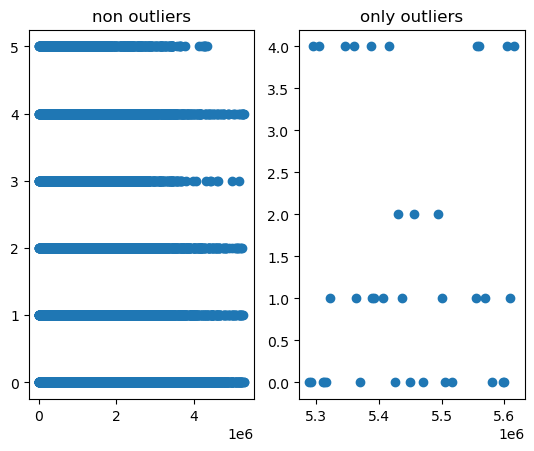

In [52]:

### outlier analysis based on total_asset vs no of dependents for ASSET ID 3

# Create views DA1 and DA2 by selecting and filtering columns
DA1 = customers[["customer_id", "number_of_dependents"]]
DA2 = customer_assets[customer_assets["asset_objective_id"] == 3]

# Create view DA3 by joining DA1 and DA2 on customer_ID and filtering by number_of_dependents = 1
DA3 = DA1.merge(DA2, on="customer_id", how="inner")
#DA3 = DA3[DA3["number_of_dependents"] == 1]



#perform outlier analysis using zscore
z = stats.zscore(DA3["total"])

cleaned3 = DA3[np.abs (z) <= 3]
outliers3 = DA3 [np.abs (z) >= 3]
#fig, (ax1, ax2) = plt.subplots(1, 2)
print(len(outliers3))


import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1

# Create a scatter plot of total vs number_of_dependents
#plt.scatter(outliers1["total"], outliers1["number_of_dependents"])
#plt.scatter(cleaned1["total"], cleaned1["number_of_dependents"])

# something i just tried so ignore if wrong

# Add labels and title
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.scatter(cleaned3["total"], cleaned3["number_of_dependents"])
ax1.set_title("non outliers")
ax2.scatter(outliers3["total"], outliers3["number_of_dependents"])
ax2.set_title("only outliers")



50


Text(0.5, 1.0, 'only outliers')

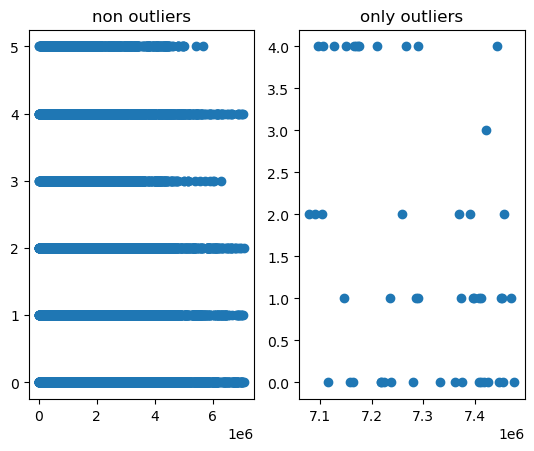

In [54]:

### outlier analysis based on total_asset vs no of dependents for ASSET ID 4

# Create views DA1 and DA2 by selecting and filtering columns
DA1 = customers[["customer_id", "number_of_dependents"]]
DA2 = customer_assets[customer_assets["asset_objective_id"] == 4]

# Create view DA3 by joining DA1 and DA2 on customer_ID and filtering by number_of_dependents = 1
DA3 = DA1.merge(DA2, on="customer_id", how="inner")
#DA3 = DA3[DA3["number_of_dependents"] == 1]



#perform outlier analysis using zscore
z = stats.zscore(DA3["total"])

cleaned4 = DA3[np.abs (z) <= 3]
outliers4=DA3 [np.abs (z) >= 3]
#fig, (ax1, ax2) = plt.subplots(1, 2)
print(len(outliers4))


import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1

# Create a scatter plot of total vs number_of_dependents
#plt.scatter(outliers1["total"], outliers1["number_of_dependents"])
#plt.scatter(cleaned1["total"], cleaned1["number_of_dependents"])

# something i just tried so ignore if wrong

# Add labels and title
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.scatter(cleaned4["total"], cleaned4["number_of_dependents"])
ax1.set_title("non outliers")
ax2.scatter(outliers4["total"], outliers4["number_of_dependents"])
ax2.set_title("only outliers")



37


Text(0.5, 1.0, 'only outliers')

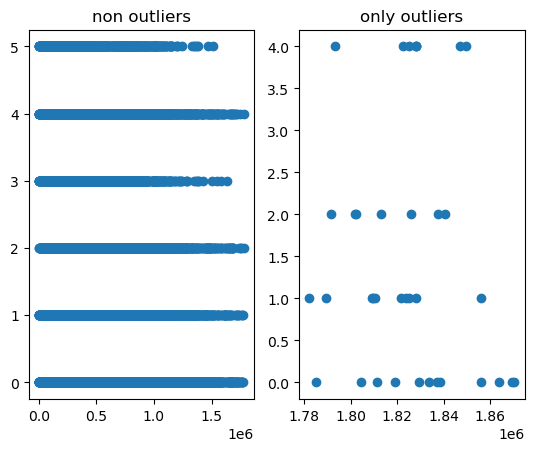

In [56]:

### outlier analysis based on total_asset vs no of dependents for ASSET ID 5

# Create views DA1 and DA2 by selecting and filtering columns
DA1 = customers[["customer_id", "number_of_dependents"]]
DA2 = customer_assets[customer_assets["asset_objective_id"] == 5]

# Create view DA3 by joining DA1 and DA2 on customer_ID and filtering by number_of_dependents = 1
DA3 = DA1.merge(DA2, on="customer_id", how="inner")
#DA3 = DA3[DA3["number_of_dependents"] == 1]



#perform outlier analysis using zscore
z = stats.zscore(DA3["total"])

cleaned5 = DA3[np.abs (z) <= 3]
outliers5=DA3 [np.abs (z) >= 3]
#fig, (ax1, ax2) = plt.subplots(1, 2)
print(len(outliers5))


import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1

# Create a scatter plot of total vs number_of_dependents
#plt.scatter(outliers1["total"], outliers1["number_of_dependents"])
#plt.scatter(cleaned1["total"], cleaned1["number_of_dependents"])

# something i just tried so ignore if wrong

# Add labels and title
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.scatter(cleaned5["total"], cleaned5["number_of_dependents"])
ax1.set_title("non outliers")
ax2.scatter(outliers5["total"], outliers5["number_of_dependents"])
ax2.set_title("only outliers")



In [57]:
outliers1.head()

,customer_id,number_of_dependents,asset_objective_id,total
202,203,0,1,3.630149e+06
209,210,0,1,3.574024e+06
235,236,0,1,3.555947e+06
276,277,1,1,3.578616e+06
282,283,4,1,3.587500e+06


In [59]:
outliers2.head()

,customer_id,number_of_dependents,asset_objective_id,total
156,157,0,2,1.846587e+06
237,238,0,2,1.819797e+06
278,279,4,2,1.820678e+06
281,282,4,2,1.794187e+06
430,431,0,2,1.834275e+06


In [61]:
df1 = pd.concat([outliers1, outliers2], ignore_index=True, sort=False)
df2 = pd.concat([df1, outliers3], ignore_index=True, sort=False)
df3 = pd.concat([df2, outliers4], ignore_index=True, sort=False)
df4 = pd.concat([df3, outliers5], ignore_index=True, sort=False)

In [64]:
df4.sort_values("customer_id")

,customer_id,number_of_dependents,asset_objective_id,total
121,11,0,4,7.218635e+06
84,40,4,3,5.304698e+06
171,125,2,5,1.840789e+06
42,157,0,2,1.846587e+06
85,159,0,3,5.449904e+06
...,...,...,...,...
82,9833,4,2,1.792275e+06
41,9833,4,1,3.736543e+06
83,9913,2,2,1.783459e+06
169,9946,1,4,7.410972e+06


In [68]:
print(len(outliers1))
print(len(outliers2))
print(len(outliers3))
print(len(outliers4))
print(len(outliers5))

42
42
37
50
37


In [70]:
len(df4)

208

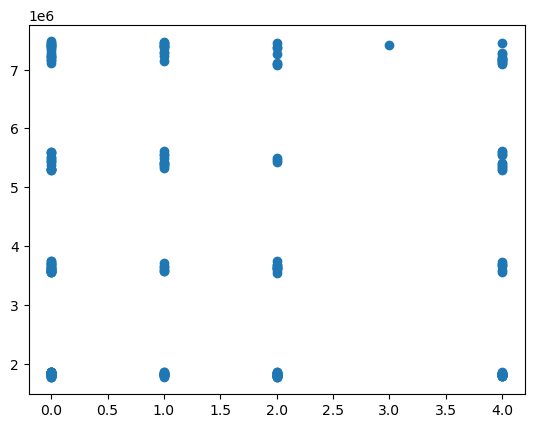

In [72]:
plt.scatter(df4["number_of_dependents"], df4["total"])

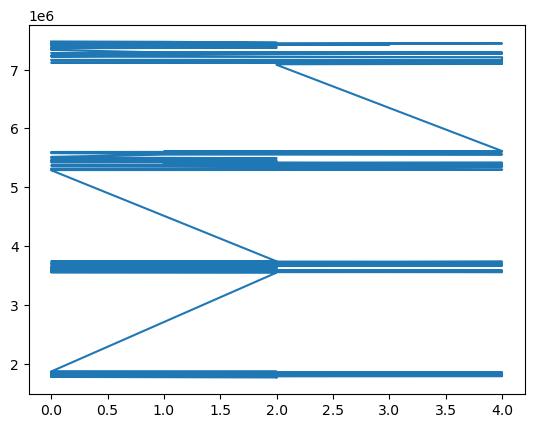

In [74]:
df4 = df4.sort_values('total')
plt.plot(df4['number_of_dependents'], df4['total'])

<BarContainer object of 208 artists>

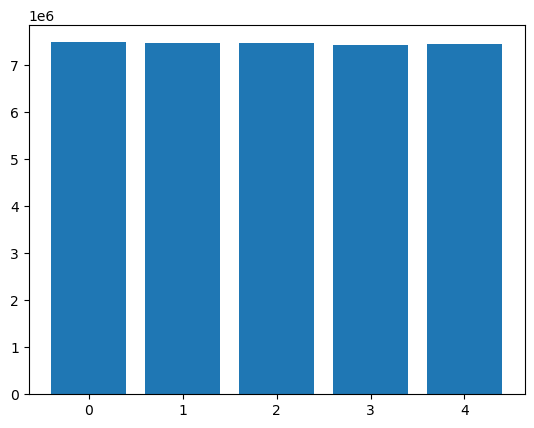

In [436]:
plt.bar(df4['number_of_dependents'], df4['total'])

In [439]:
df4.head(1)

,customer_id,number_of_dependents,asset_objective_id,total
79,9266,2,2,1.770286e+06


<BarContainer object of 208 artists>

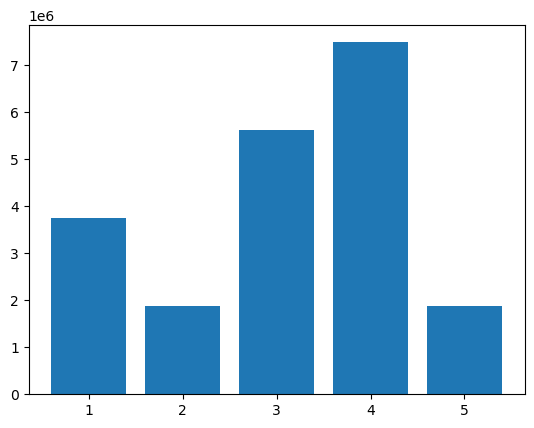

In [441]:
plt.bar(df4['asset_objective_id'], df4['total'])

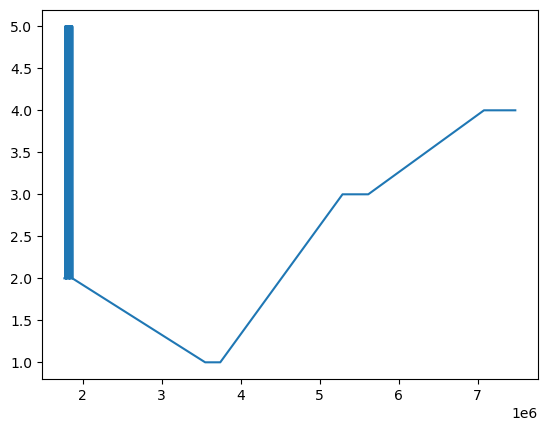

In [443]:
plt.plot(df4['total'], df4['asset_objective_id'])

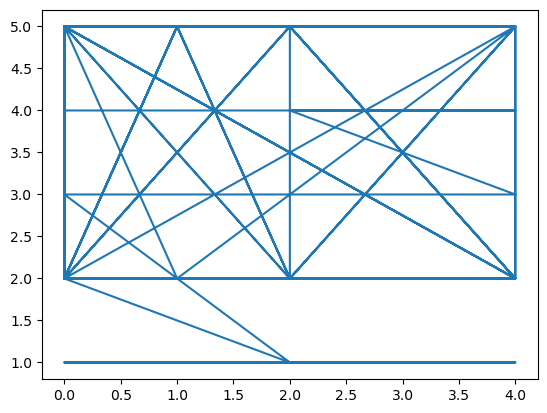

In [444]:
plt.plot(df4['number_of_dependents'], df4['asset_objective_id'])

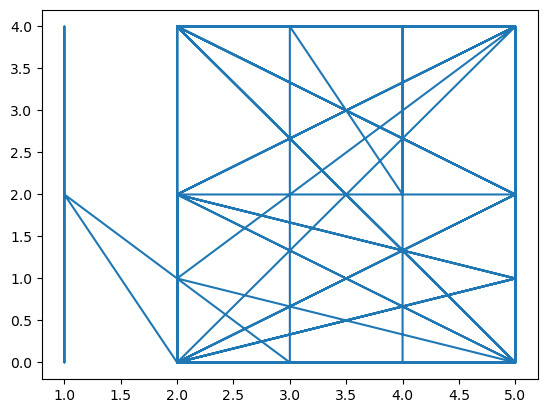

In [445]:
plt.plot( df4['asset_objective_id'], df4['number_of_dependents'])

<BarContainer object of 208 artists>

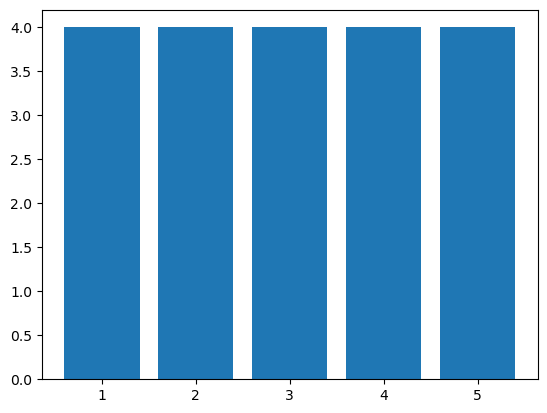

In [450]:
plt.bar( df4['asset_objective_id'], df4['number_of_dependents'])

<BarContainer object of 208 artists>

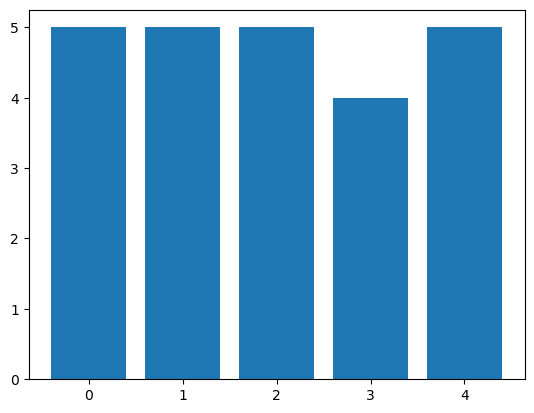

In [451]:
plt.bar(df4['number_of_dependents'], df4['asset_objective_id'])

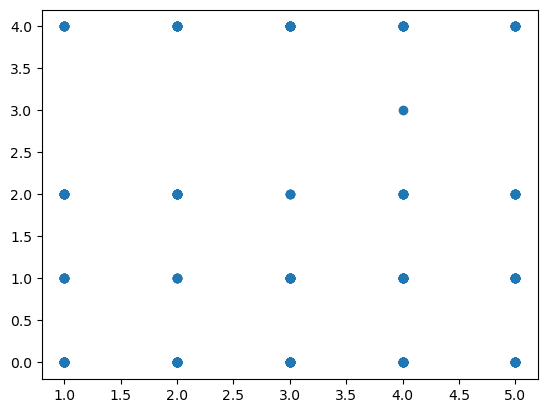

In [452]:
plt.scatter( df4['asset_objective_id'], df4['number_of_dependents'])

In [76]:
df1 = pd.concat([cleaned1, cleaned2], ignore_index=True, sort=False)
df2 = pd.concat([df1, cleaned3], ignore_index=True, sort=False)
df3 = pd.concat([df2, cleaned4], ignore_index=True, sort=False)
df4 = pd.concat([df3, cleaned5], ignore_index=True, sort=False)

In [77]:
df4.head()

,customer_id,number_of_dependents,asset_objective_id,total
0,1,0,1,1.157902e+05
1,2,0,1,1.991070e+06
2,3,0,1,1.569350e+06
3,4,0,1,2.162568e+06
4,5,0,1,1.366450e+06


In [126]:
risk_score_df

,customer_ID,Risk_Score
0,1,2.833333
1,2,4.000000
2,3,3.000000
3,4,2.833333
4,5,2.833333
...,...,...
9995,9996,3.142857
9996,9997,2.857143
9997,9998,2.833333
9998,9999,2.833333


In [128]:
query = "select a.*, b.risk_score from df4 a join risk_score_df b on a.customer_id = b.customer_id order by a.customer_id"
r1 = sqldf(query)

In [129]:
print(r1.head())

   customer_id  number_of_dependents  asset_objective_id         total  \
0            1                     0                   1  1.157902e+05   
1            1                     0                   2  7.978310e+05   
2            1                     0                   3  8.950859e+05   
3            1                     0                   4  1.115145e+06   
4            1                     0                   5  7.920459e+05   

   Risk_Score  
0    2.833333  
1    2.833333  
2    2.833333  
3    2.833333  
4    2.833333  


In [132]:
query = "select a.*, b.age, b.gender, b.marital_status from r1 a join customers b on a.customer_id = b.customer_id order by a.customer_id"
r2 = sqldf(query)

In [134]:
print(r2.head())

   customer_id  number_of_dependents  asset_objective_id         total  \
0            1                     0                   1  1.157902e+05   
1            1                     0                   2  7.978310e+05   
2            1                     0                   3  8.950859e+05   
3            1                     0                   4  1.115145e+06   
4            1                     0                   5  7.920459e+05   

   Risk_Score  age gender marital_status  
0    2.833333   65   Male        Married  
1    2.833333   65   Male        Married  
2    2.833333   65   Male        Married  
3    2.833333   65   Male        Married  
4    2.833333   65   Male        Married  


In [136]:
df = r2

<Axes: xlabel='gender', ylabel='Risk_Score'>

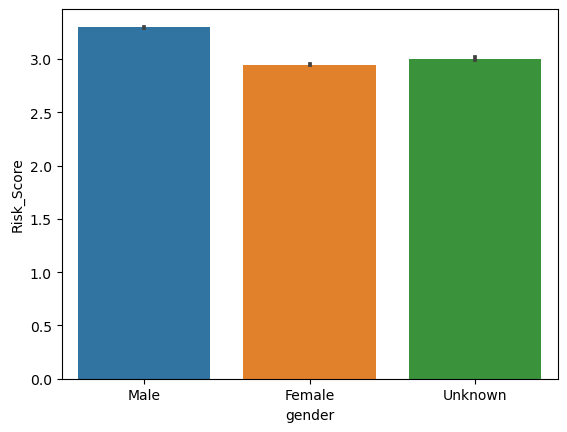

In [140]:
sns.barplot(data=df, x='gender', y='Risk_Score')

<Axes: xlabel='marital_status', ylabel='Risk_Score'>

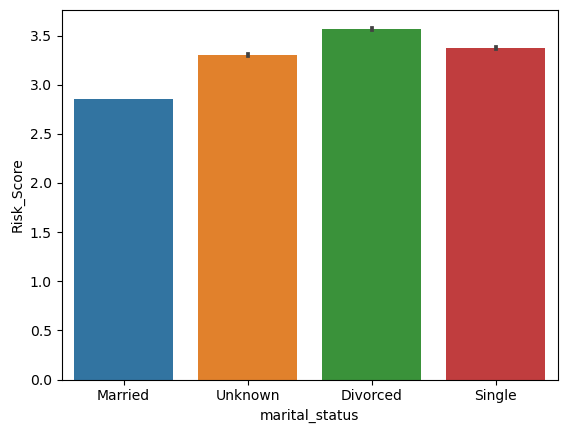

In [142]:
sns.barplot(data=df, x='marital_status', y='Risk_Score')

<Axes: xlabel='dpnt_range', ylabel='Risk_Score'>

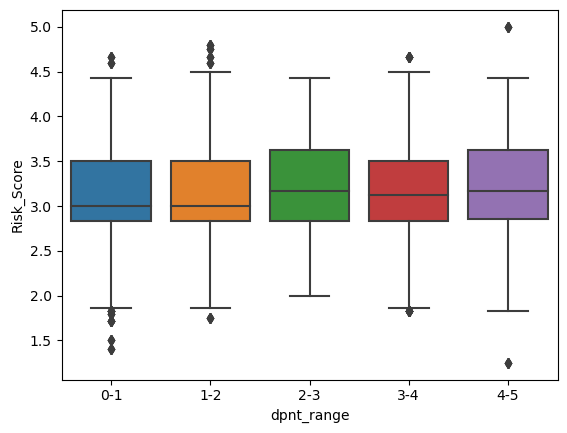

In [144]:
# df = res1
df['dpnt_range'] = pd.cut(df['number_of_dependents'], bins=[0,1,2,3,4,5], labels=['0-1','1-2', '2-3', '3-4', '4-5'])
sns.boxplot(x='dpnt_range', y='Risk_Score', data=df)

<Axes: xlabel='dpnt_range', ylabel='Risk_Score'>

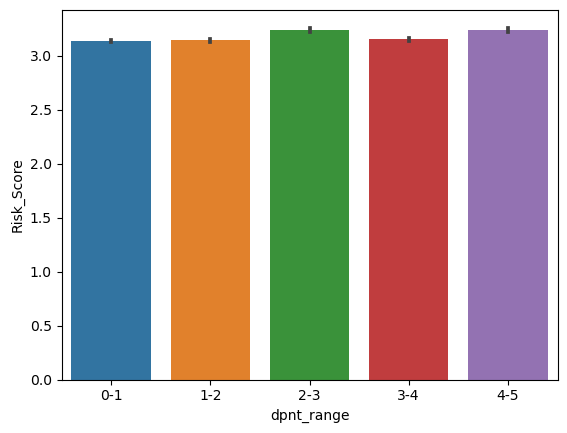

In [146]:
sns.barplot(x='dpnt_range', y='Risk_Score', data=df)

<Axes: xlabel='number_of_dependents', ylabel='Risk_Score'>

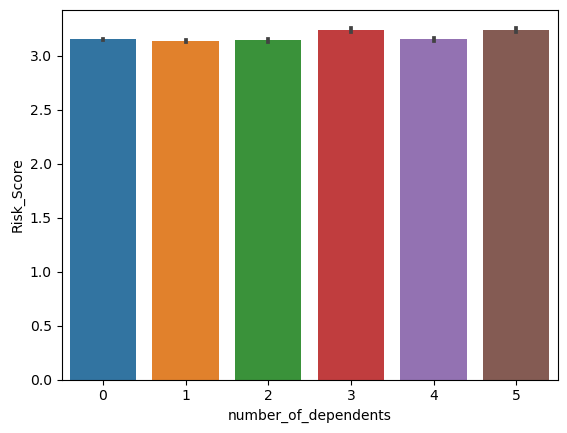

In [148]:
sns.barplot(x='number_of_dependents', y='Risk_Score', data=df)

<Axes: xlabel='total', ylabel='Risk_Score'>

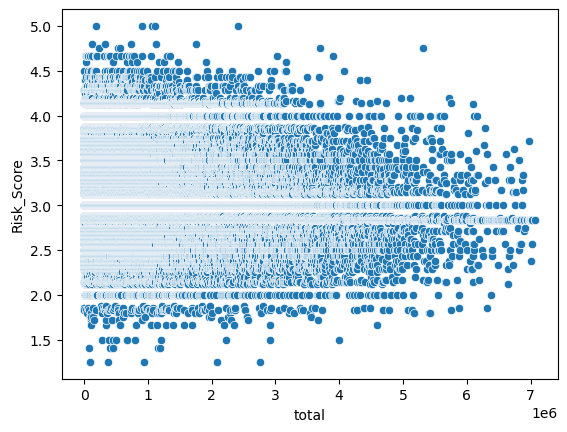

In [164]:
sns.scatterplot(x='total', y='Risk_Score', data=df)

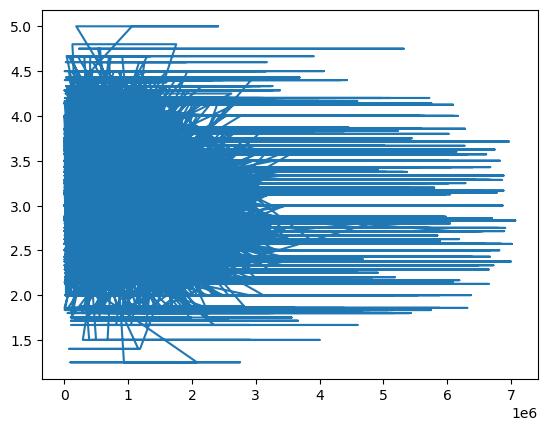

In [152]:
plt.plot('total', 'Risk_Score', data=df)

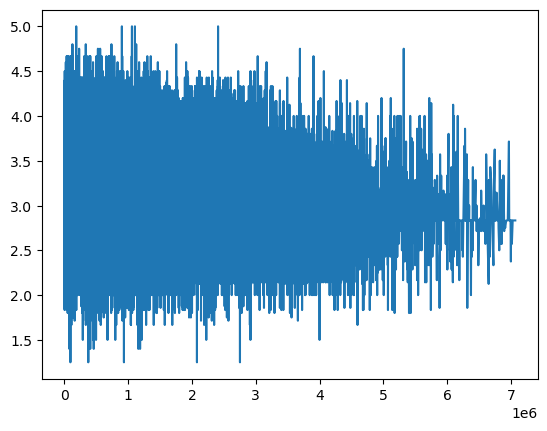

In [154]:
df = df.sort_values('total')
plt.plot(df['total'],df['Risk_Score'])

<BarContainer object of 49792 artists>

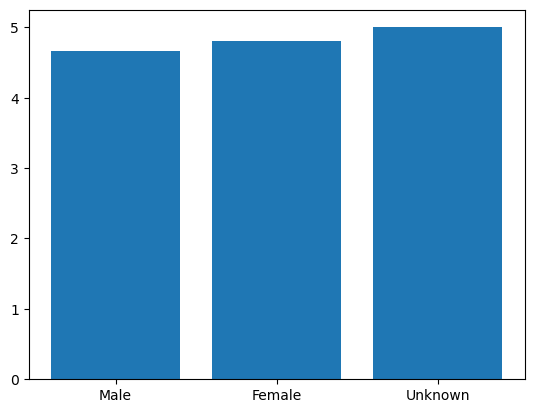

In [156]:
df = df.sort_values('total')
plt.bar(df['gender'],df['Risk_Score'])

In [157]:
arr1 = df.groupby('age')['Risk_Score'].mean()
arr1

age
33    3.577102
34    3.467002
35    3.459207
36    3.493734
37    3.489717
38    3.507815
39    3.519694
40    3.152796
41    3.210720
42    3.208415
43    3.248431
44    3.218790
45    3.169772
46    3.231319
47    3.193338
48    3.241716
49    3.216964
50    3.204478
51    3.200133
52    3.224767
53    3.259695
54    3.234690
55    3.184524
56    3.260560
57    3.201586
58    3.232412
59    3.123057
60    3.335800
61    3.152890
62    3.196753
63    3.210879
64    3.195526
65    2.942537
66    2.952908
67    2.950029
68    2.896096
69    2.910190
70    2.915284
71    2.913397
72    2.943823
73    2.937164
74    2.956367
75    2.935157
Name: Risk_Score, dtype: float64

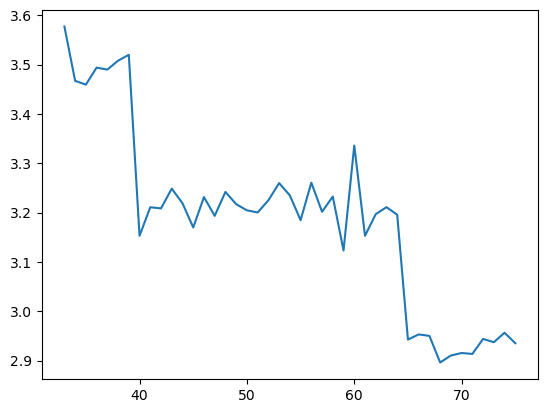

In [158]:
plt.plot(arr1)

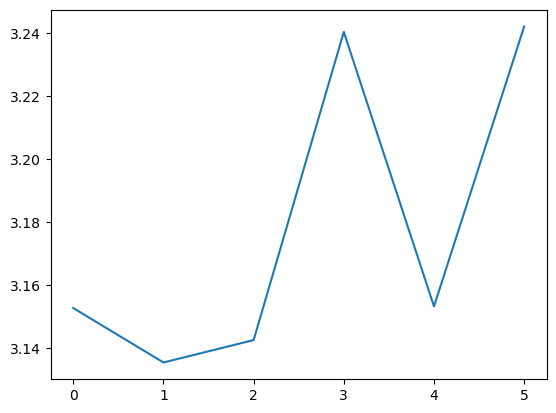

In [159]:
arr2 = df.groupby('number_of_dependents')['Risk_Score'].mean()
plt.plot(arr2)